# Логистическая регессия с использованием Lasagne

In [255]:
import lasagne
import theano

import matplotlib.pyplot as plt
import numpy as np
import theano.tensor as T

In [256]:
%matplotlib inline

## Обучающая выборка

Как и в примере на theano, рассмотрим два класса точек на плоскости

### Создание выборки

In [257]:
n_objects = 1000
space_dim = 2

X_train = np.zeros((n_objects, space_dim))
y_train = np.zeros(n_objects)

X_train[:(n_objects // 2)] = np.random.randn(n_objects // 2, space_dim)
X_train[(n_objects // 2):] = np.random.randn(n_objects // 2, space_dim) + 2

y_train[:(n_objects // 2)] = 1

### Визуализация выборки

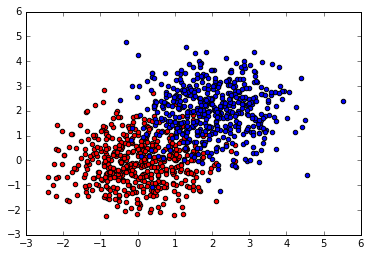

In [258]:
for i in range(len(y_train)):
    if y_train[i]:
        plt.scatter(X_train[i,0],X_train[i,1], c='r')
    else:
        plt.scatter(X_train[i,0],X_train[i,1], c='b')
        
plt.show()

## Построение модели

In [259]:
def build_model(n_outputs, learning_rate=0.01):
    X = T.matrix('X')
    y = T.ivector('y')
    
    in_layer = lasagne.layers.InputLayer(shape=(None, 2), input_var=X)
    out_layer = lasagne.layers.DenseLayer(in_layer, 1, 
                                          nonlinearity=lasagne.nonlinearities.sigmoid)
    
    pred_y = lasagne.layers.get_output(out_layer, X)
    
    params = lasagne.layers.get_all_params(out_layer, trainable=True)
    
    loss = lasagne.objectives.aggregate(lasagne.objectives.binary_crossentropy(pred_y, y))
    acc = T.mean(T.eq(pred_y, y))
    
    cost = T.grad(loss, params)
    
    updates = lasagne.updates.sgd(cost, params, learning_rate=learning_rate)
    
    train_f = theano.function(inputs=[X, y], outputs=[loss, acc],
                              updates=updates, allow_input_downcast=True)
    pred_f = theano.function(inputs=[X], outputs=T.flatten(pred_y > 0.5), allow_input_downcast=True)
    
    return train_f, pred_f

## Обучение модели

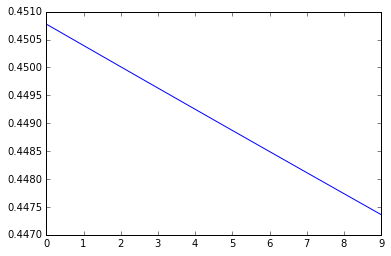

In [260]:
train_f, pred_f = build_model(len(y_train))

n_eras = 10

train_losses = list()

for _ in range(n_eras):
    train_losses.append(train_f(X_train, y_train)[0])
    
plt.plot(range(len(train_losses)), train_losses)
plt.show()

## Тестирование модели

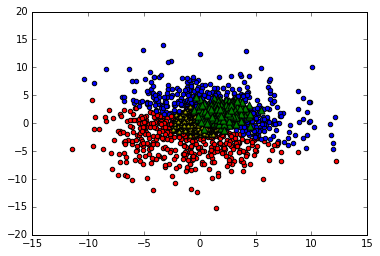

In [261]:
X_test = np.random.randn(n_objects, space_dim) * 4

y_test = pred_f(X_test)

# print(y_test)

for i in range(len(y_test)):
    if y_test[i] == 1:
        plt.scatter(X_test[i,0],X_test[i,1], c='r')
    else:
        plt.scatter(X_test[i,0],X_test[i,1], c='b')
        
for i in range(len(y_train)):
    if y_train[i] == 1:
        plt.scatter(X_train[i,0],X_train[i,1], c='y', marker='*', s=50)
    else:
        plt.scatter(X_train[i,0],X_train[i,1], c='g', marker='^', s=50)
        
plt.show()